<a href="https://colab.research.google.com/github/faaizali124/DEP/blob/main/Task04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [13]:
(X_train,Y_train),(X_test,Y_test) = datasets.cifar10.load_data()

In [14]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [15]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [28]:
Y_train = Y_train.reshape(-1,)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [29]:
X_train[1]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

In [31]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [32]:
classes[9]

'truck'

In [40]:
def plot_sample(X,Y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[Y[index]])

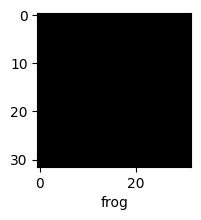

In [41]:
plot_sample(X_train, Y_train, 0)

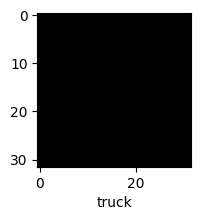

In [42]:
plot_sample(X_train, Y_train, 1)

In [36]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [43]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 47ms/step - accuracy: 0.1614 - loss: 2.2014
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 51ms/step - accuracy: 0.3256 - loss: 1.8729
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 55ms/step - accuracy: 0.3564 - loss: 1.7762
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 130s 47ms/step - accuracy: 0.3807 - loss: 1.7020
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy: 0.4019 - loss: 1.6528
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.4137 - loss: 1.6148
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy: 0.4327 - loss: 1.5843
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 48ms/step - accuracy: 0.4443 - loss: 1.5388
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 46ms/step - accuracy: 0.4505 - loss: 1.5180
Epoch 10/10
 596/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 45ms/step - accuracy: 0.4641 - loss: 1.4917

In [ ]:
Y_test[:5]

In [ ]:
Y_test = Y_test.reshape(-1,)
Y_test[:5]

In [ ]:
plot_sample(X_test, Y_test, 14)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

In [ ]:
np.argmax(y_pred[1])

In [ ]:
y_class = [np.argmax(element) for element in y_pred]
y_class[:5]

In [ ]:
  cnn.evaluate(X_test, Y_test)

In [ ]:
Y_test[:5]